# Saturation Calculation

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from skimage import data, io, color, img_as_ubyte

### Load Image Stack

In [2]:
# The first 125 slices of the original 1516x793x793 stack was removed, then scaled down to 173x793x793
image = img_as_ubyte(io.imread('0d_seg_grain_water_z173.tif'))
# image properties
print('Geometry of image (z,x,y,a) is', image.shape)
print('Image intensity range is from',image.min(),'to',image.max())
# n+1th slice of image[n]
image[1]

Geometry of image (z,x,y,a) is (173, 708, 708)
Image intensity range is from 0 to 255


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Create Subvolume

Geometry of image (z,x,y) is (500, 500)
Image intensity range is from 0 to 255


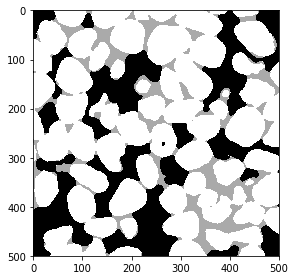

In [3]:
subvolume = image[15,100:600,100:600]
print('Geometry of image (z,x,y) is', subvolume.shape)
print('Image intensity range is from',subvolume.min(),'to',subvolume.max())
io.imshow(subvolume)

### Calculate Saturation for Subvolume

In [4]:
gas = (subvolume == 0).sum() # black
brine = ((subvolume > 0) & (subvolume < 255)).sum() # light gray
grain = (subvolume == 255).sum() # white
total = gas + brine + grain
pore = total - grain

phi = pore/total
Sw = brine/pore 
Sg = gas/pore

print('Porosity =',np.round(phi,decimals=4))
print('Water Saturation =',np.round(Sw,decimals=4))
print('Gas Saturation =',np.round(Sg,decimals=4))

Porosity = 0.3754
Water Saturation = 0.3102
Gas Saturation = 0.6898


### Calculate Saturation Profile for Entire Volume

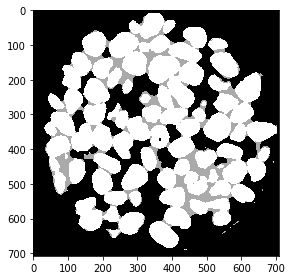

In [5]:
io.imshow(image[15])

In [6]:
D = image.shape[1]
background = np.round((np.power(D,2) - (np.pi * np.power(D,2)/4)),0)
gas = (image[15] == 0).sum() - background # black
brine = ((image[15] > 0) & (image[15] < 255)).sum() # light gray
grain = (image[15] == 255).sum() # white
total = gas + brine + grain
pore = total - grain

phi = pore/total
Sw = brine/pore 
Sg = gas/pore

print('Porosity =',np.round(phi,decimals=4))
print('Water Saturation =',np.round(Sw,decimals=4))
print('Gas Saturation =',np.round(Sg,decimals=4))

Porosity = 0.4602
Water Saturation = 0.2022
Gas Saturation = 0.7978


### Calculate Saturation Profile for Subvolume

In [7]:
L = len(image) # number of slices 
phi_profile = np.zeros(L) # create dummy array
Sw_profile = np.zeros(L) # create dummy array
Sg_profile = np.zeros(L) # create dummy array


for Z in range(0,L): 
    sliceZ = image[Z,100:600,100:600]
    gas = (sliceZ == 0).sum() # black
    brine = ((sliceZ > 0) & (sliceZ < 255)).sum() # light gray
    grain = (sliceZ == 255).sum() # white
    total = gas + brine + grain
    pore = total - grain
    phi_profile[Z] = pore/total
    Sw_profile[Z] = brine/pore 
    Sg_profile[Z] = gas/pore

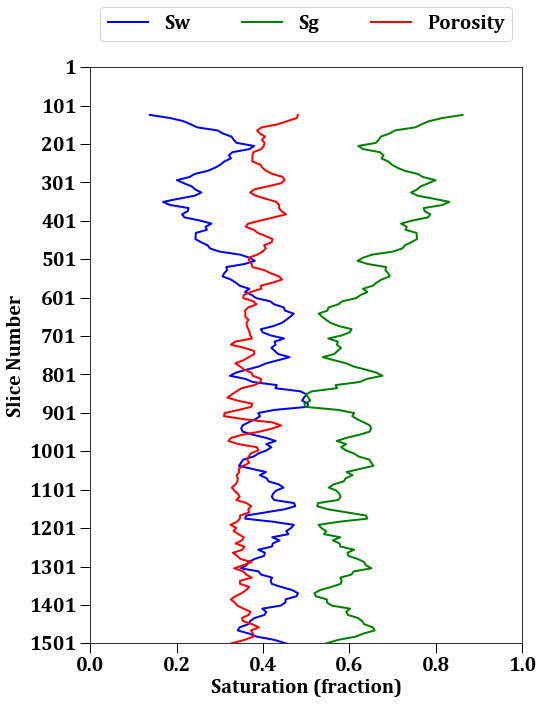

In [8]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Cambria'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1

depth = np.linspace(125,1516,L) 

plt.subplot(111)
plt.plot(Sw_profile,depth,'b-', linewidth=2, markersize=6,label="Sw")
plt.plot(Sg_profile,depth,'g-', linewidth=2, markersize=6,label="Sg")
plt.plot(phi_profile,depth,'r-', linewidth=2, markersize=6,label="Porosity")
plt.xlabel('Saturation (fraction)')
plt.ylabel('Slice Number')
plt_xmin=0
plt_xmax=1
plt.xlim([plt_xmin,plt_xmax])
plt.xticks(np.arange(plt_xmin,plt_xmax+0.01,0.2))
plt_ymin=1
plt_ymax=1500
plt.ylim([plt_ymax,plt_ymin])
plt.yticks(np.arange(plt_ymin,plt_ymax+10,100))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=4, mode="expand")
#plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=2, wspace=0.6, hspace=0.3)
plt.savefig('0d_seg_grain_water_z173_saturationprofile.png',dpi=600,bbox_inches="tight")
plt.show() 

In [9]:
print('Average Porosity =',np.round(np.average(phi_profile),decimals=4))
print('Average Water Saturation =',np.round(np.average(Sw_profile),decimals=4))
print('Average Gas Saturation =',np.round(np.average(Sg_profile),decimals=4))

Average Porosity = 0.3726
Average Water Saturation = 0.3686
Average Gas Saturation = 0.6314


### Calculate Saturation Profile for Entire Volume

In [10]:
D = image.shape[1] # length, width of image
L = len(image) # number of slices 
phi_profile = np.zeros(L) # create dummy array
Sg_profile = np.zeros(L) # create dummy array
Sw_profile = np.zeros(L) # create dummy array

for Z in range(0,L): 
    sliceZ = image[Z]
    background = np.round((np.power(D,2) - (np.pi * np.power(D,2)/4)),0)
    gas = (sliceZ == 0).sum() - background # black
    brine = ((sliceZ > 0) & (sliceZ < 255)).sum() # light gray
    grain = (sliceZ == 255).sum() # white
    total = gas + brine + grain
    pore = total - grain
    phi_profile[Z] = pore/total
    Sw_profile[Z] = brine/pore 
    Sg_profile[Z] = gas/pore

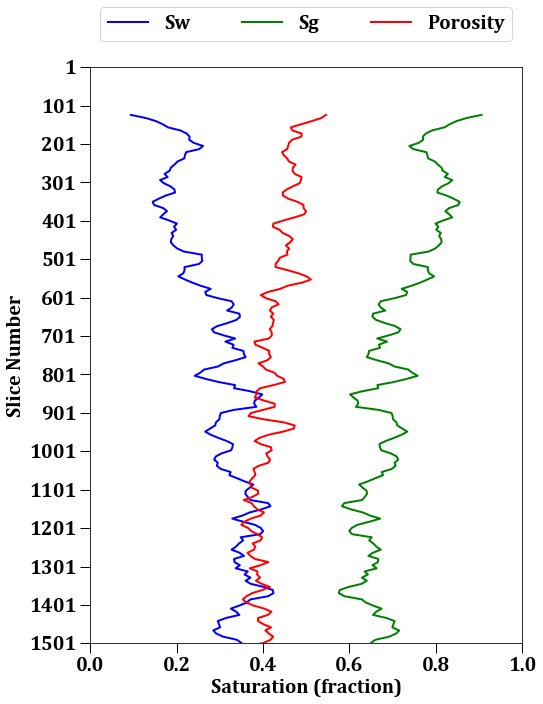

In [11]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Cambria'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1

depth = np.linspace(125,1516,L) 

plt.subplot(111)
plt.plot(Sw_profile,depth,'b-', linewidth=2, markersize=6,label="Sw")
plt.plot(Sg_profile,depth,'g-', linewidth=2, markersize=6,label="Sg")
plt.plot(phi_profile,depth,'r-', linewidth=2, markersize=6,label="Porosity")
plt.xlabel('Saturation (fraction)')
plt.ylabel('Slice Number')
plt_xmin=0
plt_xmax=1
plt.xlim([plt_xmin,plt_xmax])
plt.xticks(np.arange(plt_xmin,plt_xmax+0.01,0.2))
plt_ymin=1
plt_ymax=1500
plt.ylim([plt_ymax,plt_ymin])
plt.yticks(np.arange(plt_ymin,plt_ymax+10,100))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=4, mode="expand")
#plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=2, wspace=0.6, hspace=0.3)
plt.savefig('0d_seg_grain_water_z173_saturationprofile.png',dpi=600,bbox_inches="tight")
plt.show() 

In [12]:
print('Average Porosity =',np.round(np.average(phi_profile),decimals=4))
print('Average Water Saturation =',np.round(np.average(Sw_profile),decimals=4))
print('Average Gas Saturation =',np.round(np.average(Sg_profile),decimals=4))

Average Porosity = 0.4213
Average Water Saturation = 0.29
Average Gas Saturation = 0.71


In [13]:
data = {'Porosity':phi_profile, 'Water Saturation':Sw_profile, 'Gas Saturation':Sg_profile} 
df = pd.DataFrame(data) 
df.to_csv("0d_seg_grain_water_z173.csv")     
df.describe().to_csv("0d_seg_grain_water_z173_summary.csv")   
df.describe()

Porosity  Water Saturation  Gas Saturation
count  173.000000        173.000000      173.000000
mean     0.421304          0.290006        0.709994
std      0.041280          0.074285        0.074285
min      0.339555          0.094235        0.575770
25%      0.388438          0.221960        0.653569
50%      0.416132          0.300614        0.699386
75%      0.454922          0.346431        0.778040
max      0.545937          0.424230        0.905765